In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout

import matplotlib.pyplot as plt

In [5]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 10s 1us/step


In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


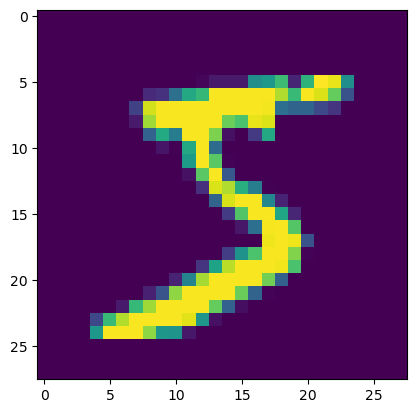

In [9]:
plt.imshow(X_train[0])

In [11]:
X_train = X_train/255
X_test = X_test/255

In [17]:
model = Sequential()

model.add(Flatten(input_shape =(28,28)))
model.add(Dense(128, activation ='relu'))
model.add(Dense(64,activation ='relu'))
model.add(Dense(10,activation ='softmax'))

In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss= 'sparse_categorical_crossentropy' , 
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [25]:
history = model.fit(X_train,y_train,
          epochs = 20,
          verbose =1,
          validation_split = 0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9954 - loss: 0.0137 - val_accuracy: 0.9744 - val_loss: 0.1161
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9958 - loss: 0.0121 - val_accuracy: 0.9732 - val_loss: 0.1427
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9946 - loss: 0.0158 - val_accuracy: 0.9743 - val_loss: 0.1496
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9967 - loss: 0.0103 - val_accuracy: 0.9743 - val_loss: 0.1346
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9962 - loss: 0.0105 - val_accuracy: 0.9737 - val_loss: 0.1467
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9961 - loss: 0.0109 - val_accuracy: 0.9735 - val_loss: 0.1616
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9970 - loss: 0.0087 - val_accuracy: 0.9711 - val_loss: 0.1692
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9968 - loss: 0.0095 -

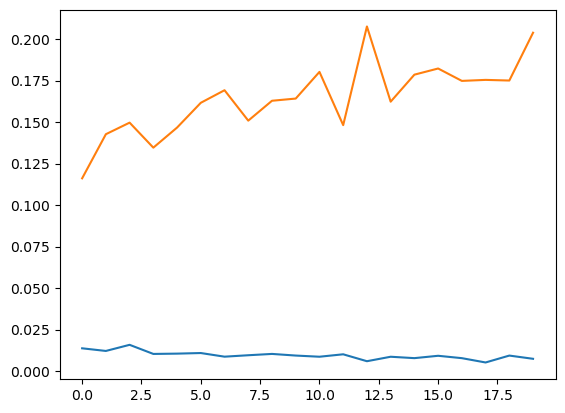

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

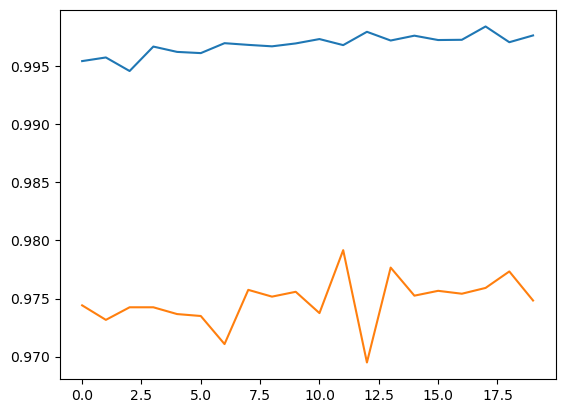

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [31]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [35]:
y_pred = y_prob.argmax(axis = 1)
y_pred[0]

7

In [37]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9787